In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings

## VISUALIZACION DE DATOS ACTUALES

In [ ]:
#Temperaturas por país
gtc=pd.read_csv('./files/GlobalLandTemperaturesByCountry.csv')
gtc.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
#veo cuantas filas con Nan tengo
gtc.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [ ]:
#Contamos con muchos NaN, vamos a eliminar esas filas
gtc.dropna(axis='index',how='any', subset=['AverageTemperature'], inplace=True)

In [ ]:
#Analisis de los paises con los que contamos con info
gtc['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

In [ ]:
#salen algunos repetidos, por ejemplo (france(europe) y france), los normalizamos
dict={
    'Denmark (Europe)':'Denmark',
    'France (Europe)':'France',
    'Netherlands (Europe)':'Netherlands',
    'United Kingdom (Europe)':'United Kingdom',
    'Congo (Democratic Republic Of The)':'Congo'
}
#cambio el diccionario
gtc['Country'].replace(dict,inplace=True)

In [ ]:
#Calcular la temperatura promedio para cada pais
avg_temp=gtc.groupby(['Country'])['AverageTemperature'].mean().to_frame().reset_index()
avg_temp

,Country,AverageTemperature
0,Afghanistan,14.045007
1,Africa,24.074203
2,Albania,12.610646
3,Algeria,22.985112
4,American Samoa,26.611965
...,...,...
232,Western Sahara,22.319818
233,Yemen,26.253597
234,Zambia,21.282956
235,Zimbabwe,21.117547


In [ ]:
#crear el mapamundi con escala de colores por temperatura
fig=px.choropleth(avg_temp,locations='Country', locationmode='country names',color='AverageTemperature')
fig.update_layout(title='Temperatura promedio por país')
fig.show()

## ANALISIS DE LA EXISTENCIA DE CALENTAMIENTO GLOBAL

In [ ]:
gt=pd.read_csv('files/GlobalTemperatures.csv')
gt.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#obtenemos el año de cada fecha para poder hacer el analisis anual de temperatura
def fetch_year(date):
    return date.split('-')[0]
#guardamos en una columna nueva el año de la medida
gt['year']=gt['dt'].apply(fetch_year)
#contamos con muchas filas con NaN, las eliminamos
gt.dropna(inplace = True)
gt.reset_index(inplace=True)

In [ ]:
#Tenemos muchas columnas innecesarias, armo un nuevo df con las columnas relevantes para el análisis, calculando el mean de la
#temperatura por año:
data=gt.groupby('year').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()
data.head()

,year,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1850,7.900667,0.876417
1,1851,8.178583,0.881917
2,1852,8.100167,0.918250
3,1853,8.041833,0.835000
4,1854,8.210500,0.825667


In [ ]:
#Agrego 2 nuevas columnas que hacen referencia al error de temperatura
data['temperatura superior']=data['LandAverageTemperature']+data['LandAverageTemperatureUncertainty']
data['temperatura inferior']=data['LandAverageTemperature']-data['LandAverageTemperatureUncertainty']
data.head()

,year,LandAverageTemperature,LandAverageTemperatureUncertainty,temperatura superior,temperatura inferior
0,1850,7.900667,0.876417,8.777083,7.024250
1,1851,8.178583,0.881917,9.060500,7.296667
2,1852,8.100167,0.918250,9.018417,7.181917
3,1853,8.041833,0.835000,8.876833,7.206833
4,1854,8.210500,0.825667,9.036167,7.384833


In [ ]:
#Visualizamos
fig=px.line(data, x='year',y=['LandAverageTemperature',
       'temperatura superior', 'temperatura inferior'],title='Temperatura promedio de la tierra a nivel mundial')
fig.show()
#nos muestra un char con la evolucion de la temperatura a lo largo de los años, tanto de la temperatura promedio, 
#como el maximo y el minimo teniendo en cuenta el error

#### NOTAMOS CLARAMENTE QUE LA TEMPERATURA TIENDE A UN INCREMENTO A LO LARGO DE LOS AÑOS, PRONUNCIANDOSE EN LA ÚLTIMA DÉCADA

## VISUALIZACION DE LA TEMPERATURA PROMEDIO POR EPOCA DEL AÑO

In [ ]:
#Convertimos la columna dt a formato date, para de esta forma poder obtener el mes
gt['dt']=pd.to_datetime(gt['dt'])
#creamos la columna month, lo que nos permitira identificar la epoca facilemte
gt['month'] = gt['dt'].dt.month

In [ ]:
#Armamos la columna de epoca del año, en formato hemisferio norte, pues del hemisferio sur tengo pocos datos como
#para que afecten de forma importante en análisis
def get_season(month):
    if month >= 3 and month <= 5:
        return 'primavera'
    elif month >= 6 and month <= 8:
        return 'verano'
    elif month >= 9 and month <= 11:
        return 'otonio'
    else:
        return 'invierno'
    
#creamos la columna de epoca del año
gt['epoca']=gt['month'].apply(get_season)

In [ ]:
#creamos la lista de años de los que disponemos datos
years=gt['year'].unique()
#y las listas donde guardare los means de las temperatura por epoca para cada año
prima_temps=[]
vera_temps=[]
oto_temps=[]
invie_temps=[]

In [ ]:
for year in years:
    #creo mi filtro
    current_df=gt[gt['year'] == year]
    #si la season es primacera, calculo el mean de los 3 registros por año
    #y lo agrego a la lista
    prima_temps.append(current_df[current_df['epoca']=='primavera']['LandAverageTemperature'].mean())
    #lo mismo con las otras season
    vera_temps.append(current_df[current_df['epoca']=='verano']['LandAverageTemperature'].mean())
    oto_temps.append(current_df[current_df['epoca']=='otonio']['LandAverageTemperature'].mean())
    invie_temps.append(current_df[current_df['epoca']=='invierno']['LandAverageTemperature'].mean())

In [ ]:
#creamos el dataframe donde tenemos cada año, y su temperatura media por cada epoca 
epoca=pd.DataFrame()
epoca['year']=years
epoca['prima_temps']=prima_temps
epoca['vera_temps']=vera_temps
epoca['oto_temps']=oto_temps
epoca['invie_temps']=invie_temps
epoca.head()

,year,prima_temps,vera_temps,oto_temps,invie_temps
0,1850,7.391667,13.893667,8.109667,2.207667
1,1851,7.530667,13.900000,8.590667,2.693000
2,1852,7.513333,13.660000,8.327000,2.900333
3,1853,7.531333,14.002667,8.342667,2.290667
4,1854,7.805000,13.803333,9.007333,2.226333


In [ ]:
#graficamos la temperatura promedio por epoca del año
fig=px.line(epoca, x='year', y=['prima_temps', 'vera_temps', 'oto_temps', 'invie_temps'],title='Temperatura promedio por epoca del año')
fig.show()

#### PODEMOS NOTAR UN CLARO INCREMENTO DE LAS TEMPERATURAS, TANTO EN VERANO COMO EN INVIERNO

## HEATMAP CON ANÁLISIS GEOESPACIAL DE LOS ESTADOS DE LAS POTENCIAS

In [ ]:
gts=pd.read_csv('./files/GlobalLandTemperaturesByState.csv')
gts.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
gts['Country'].unique()

array(['Brazil', 'Russia', 'United States', 'Canada', 'India', 'China',
       'Australia'], dtype=object)

In [ ]:
lugar=input("Ingrese el lugar del que desea el heatmap ('Brazil', 'Russia', 'United States', 'Canada', 'India', 'China','Australia'):")
            #1- Brazil \n
            #2- Rusia \n
            #3- USA \n
            #4- Canada \n
            #5- India \n
            #6- China \
            #7- Australia'

In [ ]:
#Queremos solo el analisis de usa
filter=gts['Country']== lugar
#creamos el dataframe solo de USA
lug=gts[filter]
lug.dropna(inplace=True)
lug.head()

c:\Users\Usuario\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country


In [ ]:
#arreglamos el dataset para que sea con las 2 columnas que nos importan
lug=lug[['AverageTemperature','State']]
lug.head()

,AverageTemperature,State


In [ ]:
#agrupamps los estados con sus respectivos mean de temperaturas
lug_temp = lug.groupby('State')['AverageTemperature'].mean().reset_index()
lug_temp.head()

,State,AverageTemperature


In [ ]:
#Para realizar el heatmap necesitamos la latitud y longitud
from opencage.geocoder import OpenCageGeocode

In [ ]:
#Establecemos conexion a opercagegeocoder
key='bc3c0f820d954650b8fbd156cfefa99d'
geocoder=OpenCageGeocode(key)

In [ ]:
#creamos las listas donde guardaremos latitudes y longitudes de cada estado
list_lat=[]
list_long=[]
for state in lug_temp['State']:
    results=geocoder.geocode(state)
    lat=results[0]['geometry']['lat']
    lon=results[0]['geometry']['lng']
    list_lat.append(lat)
    list_long.append(lon)

In [ ]:
#insertar latitud y longitud en lug_temp
lug_temp['lat']=list_lat
lug_temp['lon']=list_long

In [ ]:
lug_temp.head()

,State,AverageTemperature,lat,lon


In [ ]:
#aplicamos el analisis espacial (heatmap)
import folium
from folium.plugins import HeatMap
basemap=folium.Map()

In [ ]:
#creamos el mapa con las temperaturas por zona
HeatMap(lug_temp[['lat','lon','AverageTemperature']]).add_to(basemap)
basemap

# ANALISIS DE TENDENCIAS PARA LA TEMPERATURA PROMEDIO DE LA TIERRA

In [ ]:
gt2=pd.read_csv('files/GlobalTemperatures.csv',header=0, index_col=0, parse_dates=True, squeeze=True)
gt2.dropna(inplace = True)
gt2.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [ ]:
col = [gt2.columns[0], gt2.columns[2], gt2.columns[4], gt2.columns[6]]
col

['LandAverageTemperature',
 'LandMaxTemperature',
 'LandMinTemperature',
 'LandAndOceanAverageTemperature']

array([<AxesSubplot:xlabel='dt'>, <AxesSubplot:xlabel='dt'>,
       <AxesSubplot:xlabel='dt'>, <AxesSubplot:xlabel='dt'>], dtype=object)

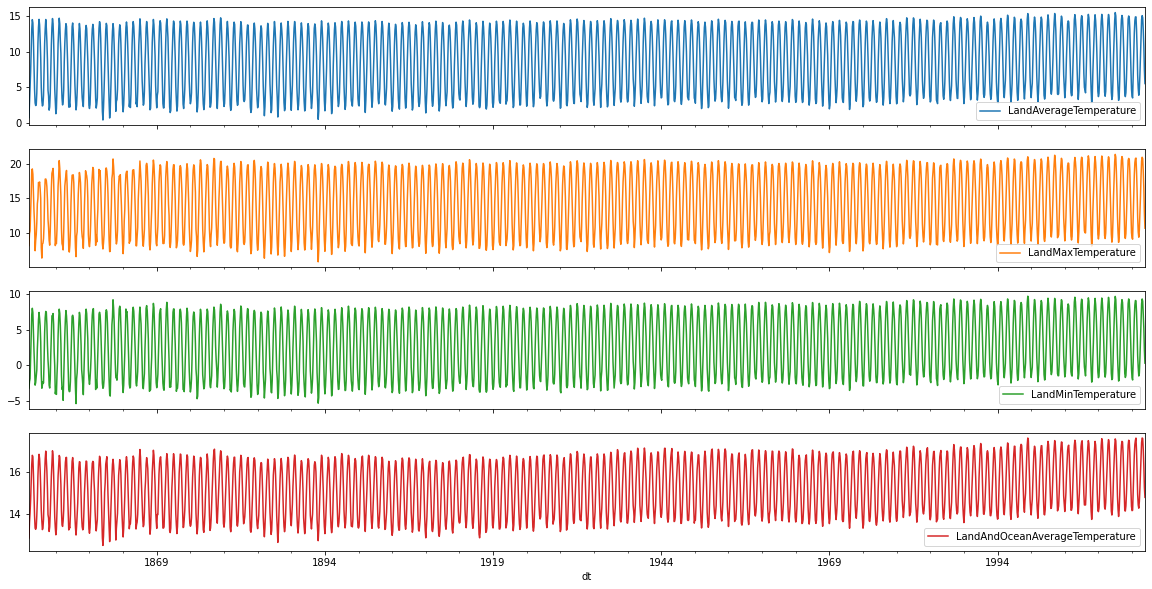

In [ ]:
gt2[col].plot(subplots=True, figsize=(20, 10))

In [ ]:
#Agrupo por año las temperaturas promedio
groups = gt2[col[0]].groupby(pd.Grouper(freq='A'))

In [ ]:
LandAverageTemperature = pd.DataFrame()
for name, group in groups:
    LandAverageTemperature[name.year] = group.values
    
LandAverageTemperature

<ipython-input-37-267ec756c735>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0.749,2.431,2.376,1.786,1.281,2.522,2.760,1.821,2.739,2.015,...,3.286,4.579,2.844,3.687,3.737,3.282,3.157,3.685,3.732,3.881
1,3.071,2.508,2.540,2.228,1.941,2.982,2.226,2.481,2.284,2.611,...,4.430,4.221,3.576,4.094,4.399,3.743,3.628,4.222,3.500,4.664
2,4.954,4.192,3.884,4.078,4.698,4.617,4.372,4.312,4.834,5.023,...,6.329,6.485,6.906,6.086,6.738,6.101,6.023,6.261,6.378,6.740
3,7.217,7.287,7.487,7.541,7.622,8.580,7.751,6.827,8.250,8.542,...,9.055,9.823,9.295,9.367,9.671,9.483,9.676,9.044,9.589,9.313
4,10.004,11.113,11.169,10.975,11.095,11.186,10.530,9.885,10.851,11.456,...,11.786,12.518,12.054,12.112,12.406,11.986,12.590,12.195,12.582,12.312
5,13.150,13.418,13.164,13.410,12.829,12.984,13.496,12.611,12.956,13.142,...,14.443,14.309,14.145,14.201,14.421,14.370,14.492,14.568,14.335,14.505
6,14.492,14.531,14.512,14.645,14.692,13.926,14.019,13.953,13.677,13.827,...,15.042,15.230,15.174,15.231,15.213,15.482,15.076,15.003,14.873,15.051
7,14.039,13.751,13.304,13.953,13.889,13.547,13.021,13.203,13.220,13.217,...,14.913,14.752,14.377,14.655,14.768,15.012,14.720,14.742,14.875,14.755
8,11.505,11.677,11.478,11.710,11.514,11.141,10.948,11.056,11.148,11.080,...,12.875,12.930,12.802,13.153,12.863,12.912,13.040,13.154,13.091,12.999
9,8.091,9.122,8.910,8.535,9.763,8.444,8.087,8.198,8.810,8.834,...,10.289,10.332,10.399,10.136,10.442,10.352,10.428,10.256,10.330,10.801


In [ ]:
y = gt2[col[0]]

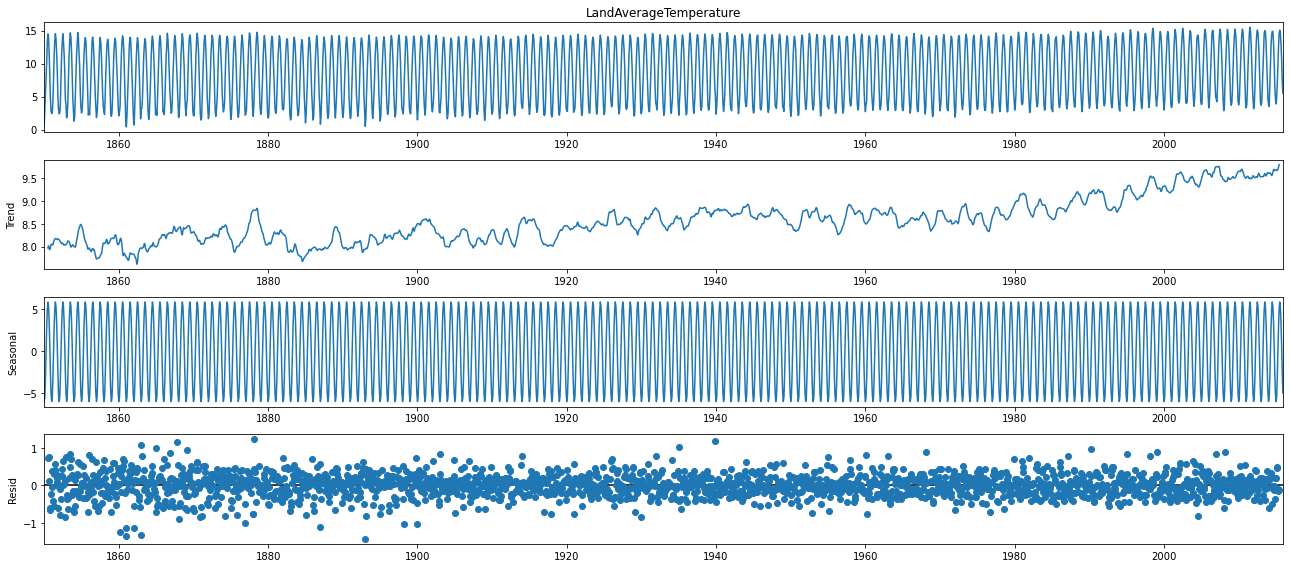

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# tsa = time series analysis
fig = decomposition.plot()

#### MODELO ARIMAX

In [ ]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
warnings.filterwarnings('ignore')

In [42]:
#Prueba todos los modelos de arima y obtengo el mejor
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:14648.232239910609
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:12071.555258261513
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2711.969242167406
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1718.884346279671
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2726.5248355473327
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1710.9350330084155
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2159.423637592593
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1718.1731219150931
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:12086.072037326961
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:9796.850612654924
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2498.303922544481
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1455.412329389753
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2517.9985894115534
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1449.2475885341469
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1923.546060008827
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1456.2365453650984
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8834.845000426783
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:6933.15511235331
AR

In [43]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit()

In [44]:
anio=input("Ingrese el año hasta el que quiere predecir los picos máximos y minimos de temp: (ej:2020-01-01)")

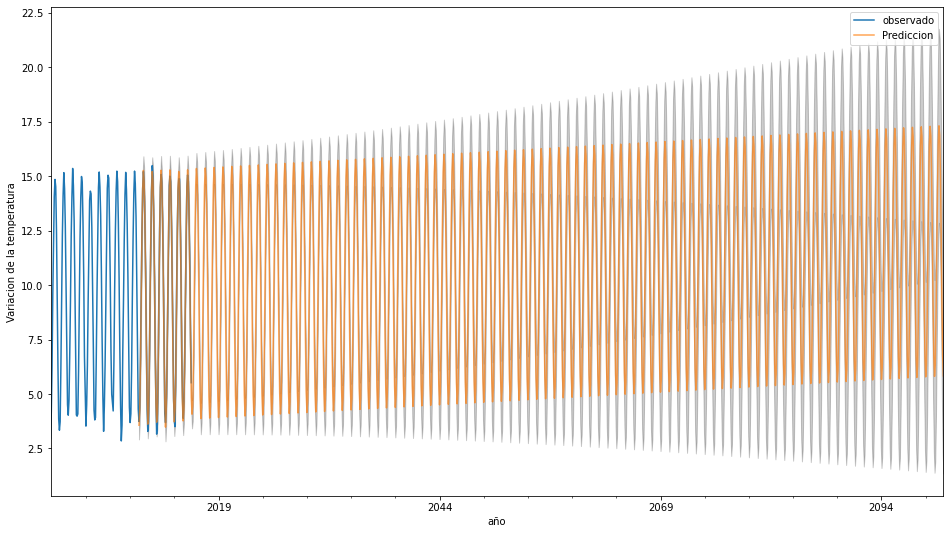

In [45]:
pred = results.get_prediction(start=pd.to_datetime('2010-01-01'), end=pd.to_datetime(anio),dynamic=False)
pred_ci = pred.conf_int()
ax = y['2000':].plot(label='observado')
pred.predicted_mean.plot(ax=ax, label='Prediccion', alpha=.7, figsize=(16, 9))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('año')
ax.set_ylabel('Variacion de la temperatura')
plt.legend()

### SE PUEDE APRECIAR UNA TENDECIA AL AUMENTO DE TEMPERATURA A FUTURO, TANTO EN LOS PICOS DE MÁS TEMPERATURA COMO DE MENOS TEMPERATURA